## Meriskill Data Analysis Internship

### Title of the project 1: “Sales Data Analysis”
### Purpose: Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.
### Description: In this project, you will dive into a large sales dataset to extract valuable insights. You will explore sales trends over time, identify the best-selling products, calculate revenue metrics such as total sales and profit margins, and create visualizations to present your findings effectively. This project showcases your ability to manipulate and derive insights from large datasets, enabling you to make data-driven recommendations for optimizing sales strategies.

In [409]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales = 'Sales.csv'

dataset = pd.read_csv(sales)
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [410]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [411]:
dataset.shape

(185950, 11)

In [412]:
dataset.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


### Preprocessing the dataset and data cleansing

In [413]:
# Separate the order date
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

# Add the day, month, year, time columns
dataset['month'] = dataset['Order Date'].dt.month
dataset['day'] = dataset['Order Date'].dt.day
dataset['time'] = dataset['Order Date'].dt.time
dataset['year'] = dataset['Order Date'].dt.year

# show the modified data frame
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,day,time,year
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,12,30,00:01:00,2019
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,12,29,07:03:00,2019
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,12,12,18:21:00,2019
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,12,22,15:13:00,2019
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12,18,12:38:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,6,7,19:02:00,2019
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,6,1,19:29:00,2019
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,6,22,18:57:00,2019
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,6,26,18:35:00,2019


In [414]:
# Add string date instead of number dates
dataset['Month'] = pd.to_datetime(dataset["month"], format="%m").dt.month_name()
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,day,time,year
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0,12,30,00:01:00,2019
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7,12,29,07:03:00,2019
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18,12,12,18:21:00,2019
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15,12,22,15:13:00,2019
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12,12,18,12:38:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,Boston,19,6,7,19:02:00,2019
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,New York City,19,6,1,19:29:00,2019
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,San Francisco,18,6,22,18:57:00,2019
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,San Francisco,18,6,26,18:35:00,2019


In [415]:
# Separate the purchase address
p = dataset["Purchase Address"].str.split(',', expand=True)
p.columns = ['Street', 'City', "State"]
p

,Street,City,State
0,136 Church St,New York City,NY 10001
1,562 2nd St,New York City,NY 10001
2,277 Main St,New York City,NY 10001
3,410 6th St,San Francisco,CA 94016
4,43 Hill St,Atlanta,GA 30301
...,...,...,...
185945,795 Pine St,Boston,MA 02215
185946,495 North St,New York City,NY 10001
185947,319 Ridge St,San Francisco,CA 94016
185948,916 Main St,San Francisco,CA 94016


In [416]:
# merge order date + purchase address + dataset
dataset['Street'] = p.Street
dataset['City'] = p.City
dataset['State'] = p.State
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,day,time,year,Street,State
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0,12,30,00:01:00,2019,136 Church St,NY 10001
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7,12,29,07:03:00,2019,562 2nd St,NY 10001
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18,12,12,18:21:00,2019,277 Main St,NY 10001
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15,12,22,15:13:00,2019,410 6th St,CA 94016
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12,12,18,12:38:00,2019,43 Hill St,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,Boston,19,6,7,19:02:00,2019,795 Pine St,MA 02215
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,New York City,19,6,1,19:29:00,2019,495 North St,NY 10001
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,San Francisco,18,6,22,18:57:00,2019,319 Ridge St,CA 94016
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,San Francisco,18,6,26,18:35:00,2019,916 Main St,CA 94016


In [417]:
# sort by order id product price each order date
product = dataset.sort_values(by=["Order ID", "Product", "Price Each", "Order Date"], ascending=True)
product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,day,time,year,Street,State
136793,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",January,700.00,Boston,21,1,22,21:25:00,2019,944 Walnut St,MA 02215
136794,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",January,14.95,Portland,14,1,28,14:15:00,2019,185 Maple St,OR 97035
136795,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",January,23.98,San Francisco,13,1,17,13:33:00,2019,538 Adams St,CA 94016
136796,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",January,149.99,Los Angeles,20,1,5,20:33:00,2019,738 10th St,CA 90001
136797,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",January,11.99,Austin,11,1,25,11:59:00,2019,387 10th St,TX 73301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24984,25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",December,14.95,San Francisco,20,12,11,20:58:00,2019,14 Madison St,CA 94016
24985,25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",December,7.68,Los Angeles,12,12,1,12:01:00,2019,549 Willow St,CA 90001
24986,25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",December,400.00,Seattle,6,12,9,06:43:00,2019,273 Wilson St,WA 98101
24987,25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",December,11.99,Dallas,10,12,3,10:39:00,2019,778 River St,TX 75001


In [418]:
# Which city sold the the most amount of products
city = dataset.groupby(["City", "Product"])[["Sales"]].sum()
city.sort_values(by="Product", ascending = False).head(10)

,,Sales
City,Product,
Seattle,iPhone,382200.0
Los Angeles,iPhone,782600.0
Boston,iPhone,527100.0
Atlanta,iPhone,380800.0
New York City,iPhone,616700.0
Dallas,iPhone,363300.0
San Francisco,iPhone,1162700.0
Portland,iPhone,315000.0
Austin,iPhone,263900.0


In [419]:
# Separate the purchase address
p = dataset["Purchase Address"].str.split(',', expand=True)
p.columns = ['Street', 'City', "State"]
p

,Street,City,State
0,136 Church St,New York City,NY 10001
1,562 2nd St,New York City,NY 10001
2,277 Main St,New York City,NY 10001
3,410 6th St,San Francisco,CA 94016
4,43 Hill St,Atlanta,GA 30301
...,...,...,...
185945,795 Pine St,Boston,MA 02215
185946,495 North St,New York City,NY 10001
185947,319 Ridge St,San Francisco,CA 94016
185948,916 Main St,San Francisco,CA 94016


In [420]:
# Add string date instead of number dates
dataset['Month'] = pd.to_datetime(dataset["month"], format="%m").dt.month_name()
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,day,time,year,Street,State
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0,12,30,00:01:00,2019,136 Church St,NY 10001
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7,12,29,07:03:00,2019,562 2nd St,NY 10001
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18,12,12,18:21:00,2019,277 Main St,NY 10001
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15,12,22,15:13:00,2019,410 6th St,CA 94016
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12,12,18,12:38:00,2019,43 Hill St,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,Boston,19,6,7,19:02:00,2019,795 Pine St,MA 02215
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,New York City,19,6,1,19:29:00,2019,495 North St,NY 10001
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,San Francisco,18,6,22,18:57:00,2019,319 Ridge St,CA 94016
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,San Francisco,18,6,26,18:35:00,2019,916 Main St,CA 94016


In [421]:
# which items was purchased daytime vs nighttime
day = dataset.groupby(["City", 'State', "Product", "Hour"])[["Sales"]].mean()
day.sort_values(by="Product", ascending = False).head(10)

Sales
City          State    Product Hour       
Seattle       WA 98101 iPhone  23    700.0
Boston        MA 02215 iPhone  6     700.0
                               0     700.0
                               1     700.0
New York City NY 10001 iPhone  23    700.0
                               22    700.0
                               21    700.0
                               20    700.0
                               19    700.0
                               18    700.0

### EDA

In [422]:
# How many products for each product type? Quantity ordered? Sale price?
dataset[["Product", "Quantity Ordered", 'Price Each', "Sales"]].value_counts(ascending=True)

Product                     Quantity Ordered  Price Each  Sales  
Apple Airpods Headphones    3                 150.00      450.00         1
USB-C Charging Cable        6                 11.95       71.70          1
                            5                 11.95       59.75          1
Bose SoundSport Headphones  3                 99.99       299.97         2
AA Batteries (4-pack)       7                 3.84        26.88          2
ThinkPad Laptop             2                 999.99      1999.98        2
AAA Batteries (4-pack)      9                 2.99        26.91          3
Vareebadd Phone             2                 400.00      800.00         3
Macbook Pro Laptop          2                 1700.00     3400.00        4
AAA Batteries (4-pack)      8                 2.99        23.92          5
Google Phone                2                 600.00      1200.00        7
Lightning Charging Cable    4                 14.95       59.80          7
iPhone                      2     

In [423]:
# How many products for each product type? Quantity ordered? Sale price?
dataset[["Product", "Quantity Ordered", 'Price Each', "Sales"]].value_counts()

Product                     Quantity Ordered  Price Each  Sales  
Lightning Charging Cable    1                 14.95       14.95      20210
USB-C Charging Cable        1                 11.95       11.95      20019
Wired Headphones            1                 11.99       11.99      17361
Apple Airpods Headphones    1                 150.00      150.00     15438
AA Batteries (4-pack)       1                 3.84        3.84       15333
AAA Batteries (4-pack)      1                 2.99        2.99       13726
Bose SoundSport Headphones  1                 99.99       99.99      13195
27in FHD Monitor            1                 149.99      149.99      7464
iPhone                      1                 700.00      700.00      6835
27in 4K Gaming Monitor      1                 389.99      389.99      6216
34in Ultrawide Monitor      1                 379.99      379.99      6163
Google Phone                1                 600.00      600.00      5518
Flatscreen TV               1     

#### Data Visualization

Text(0.5, 1.0, 'Number of Products')

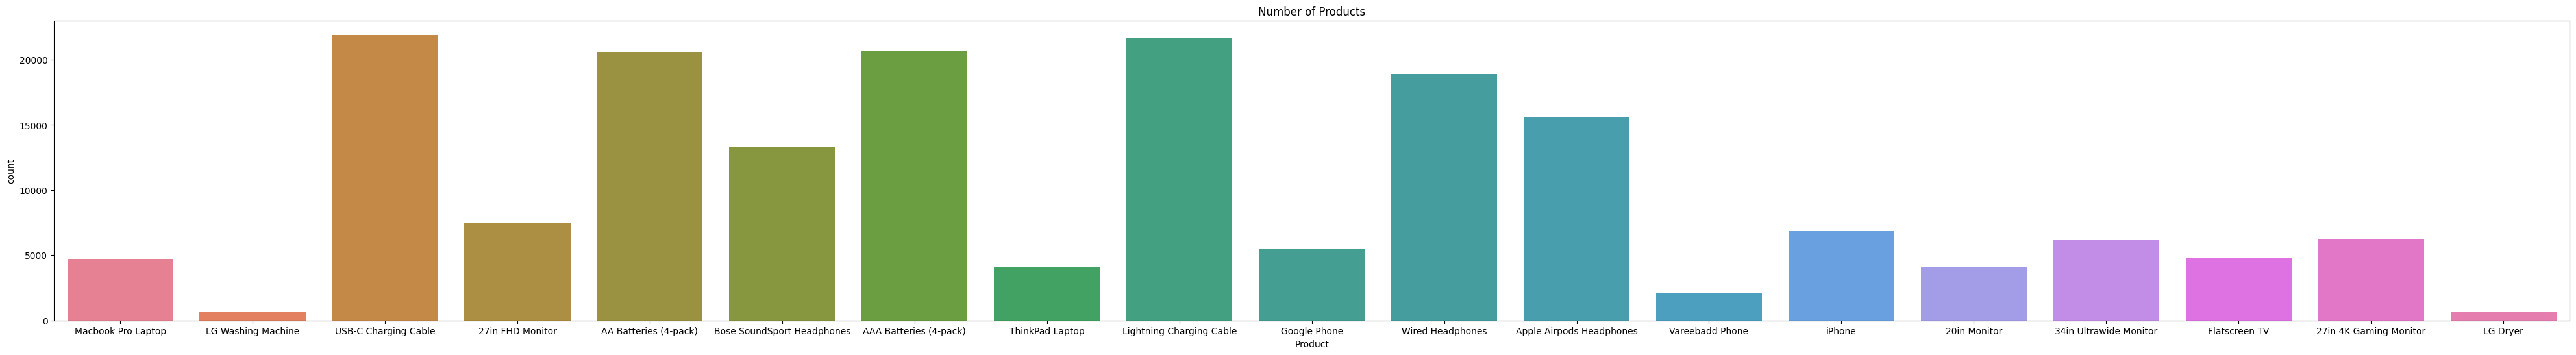

In [424]:
# Number of Products
plt.figure(figsize=(50, 6))
sns.countplot(dataset, x="Product", hue="Product", legend="auto")
plt.title("Number of Products")


Text(0.5, 1.0, 'Number of Products with the Number of Quantity Ordered')

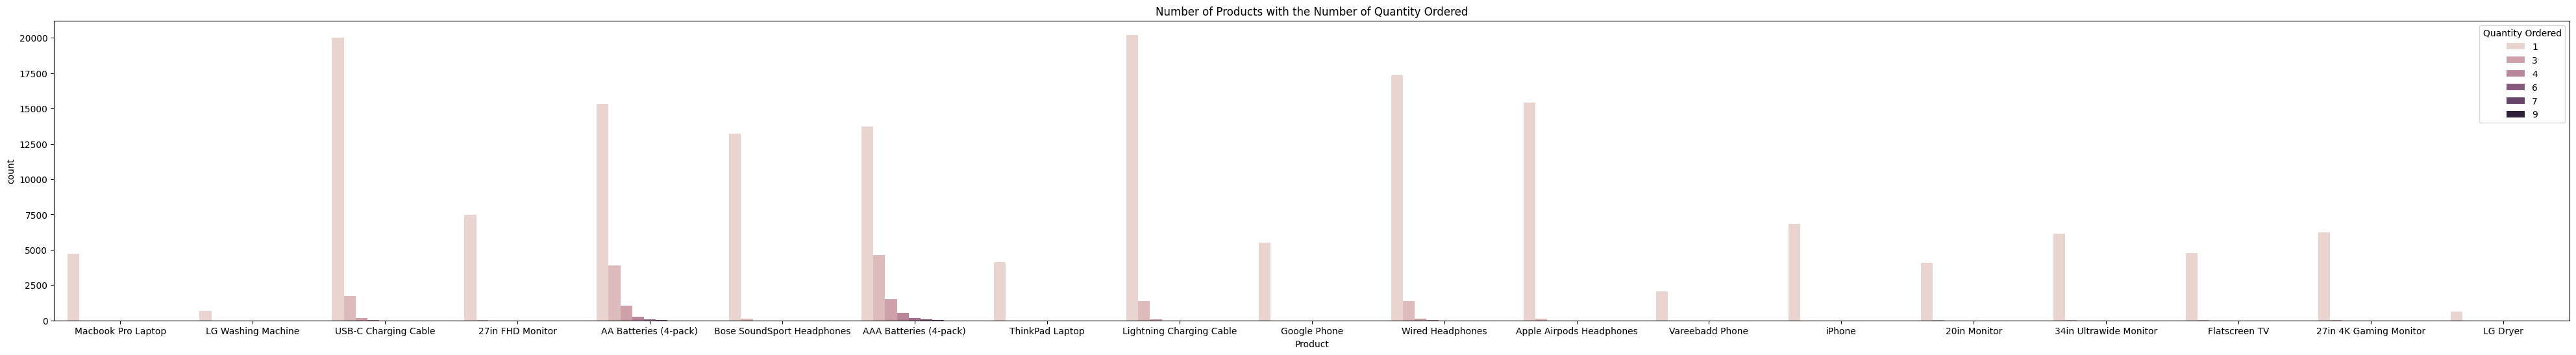

In [425]:
# Number of Product with number of quality ordered
plt.figure(figsize=(50, 6))
sns.countplot(dataset, x="Product", hue="Quantity Ordered", legend="auto")
plt.title("Number of Products with the Number of Quantity Ordered")

Text(0.5, 1.0, 'Number of Products with the Number of Quantity Ordered')

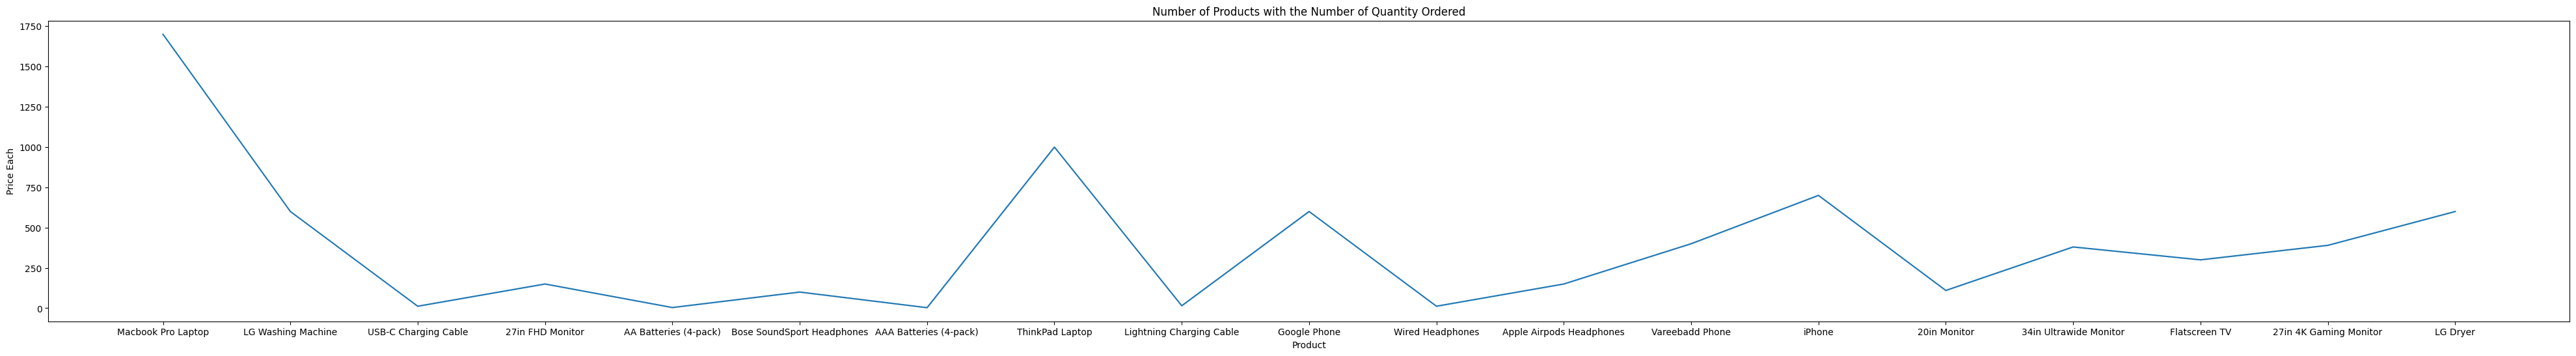

In [426]:
# Number of Products with the Number of Quantity Ordered
plt.figure(figsize=(50, 6))
sns.lineplot(data=dataset, x="Product", y="Price Each")
plt.title("Number of Products with the Number of Quantity Ordered")

In [427]:
# 
dataset.groupby(["Order ID", "Product", "Quantity Ordered", "Price Each", "Month", "Sales", "City"])[[]]
dataset.sort_values(by="Sales", ascending=True)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,month,day,time,year,Street,State
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",June,2.99,Atlanta,14,6,25,14:33:00,2019,209 11th St,GA 30301
38865,13951,189858,AAA Batteries (4-pack),1,2.99,2019-04-24 08:53:00,"212 Park St, Boston, MA 02215",April,2.99,Boston,8,4,24,08:53:00,2019,212 Park St,MA 02215
105392,6497,285003,AAA Batteries (4-pack),1,2.99,2019-11-23 18:58:00,"579 Spruce St, New York City, NY 10001",November,2.99,New York City,18,11,23,18:58:00,2019,579 Spruce St,NY 10001
38858,13944,189851,AAA Batteries (4-pack),1,2.99,2019-04-03 20:51:00,"270 Church St, Seattle, WA 98101",April,2.99,Seattle,20,4,3,20:51:00,2019,270 Church St,WA 98101
38856,13942,189849,AAA Batteries (4-pack),1,2.99,2019-04-09 17:18:00,"248 Dogwood St, Boston, MA 02215",April,2.99,Boston,17,4,9,17:18:00,2019,248 Dogwood St,MA 02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145546,8791,149611,ThinkPad Laptop,2,999.99,2019-01-31 17:47:00,"850 6th St, New York City, NY 10001",January,1999.98,New York City,17,1,31,17:47:00,2019,850 6th St,NY 10001
89114,6776,200528,Macbook Pro Laptop,2,1700.00,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",May,3400.00,Boston,13,5,13,13:40:00,2019,643 4th St,MA 02215
29683,4717,181069,Macbook Pro Laptop,2,1700.00,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",April,3400.00,San Francisco,21,4,27,21:01:00,2019,668 Park St,CA 94016
30183,5219,181544,Macbook Pro Laptop,2,1700.00,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",April,3400.00,New York City,12,4,22,12:48:00,2019,731 11th St,NY 10001


In [428]:
# Average sales for the city state product and hour
day = dataset.groupby(["City", 'State', "Product", "Hour"])[["Sales"]].mean()
day.sort_values(by="Product", ascending = False).head(10)

Sales
City          State    Product Hour       
Seattle       WA 98101 iPhone  23    700.0
Boston        MA 02215 iPhone  6     700.0
                               0     700.0
                               1     700.0
New York City NY 10001 iPhone  23    700.0
                               22    700.0
                               21    700.0
                               20    700.0
                               19    700.0
                               18    700.0

Text(0.5, 1.0, 'Sales for each Products')

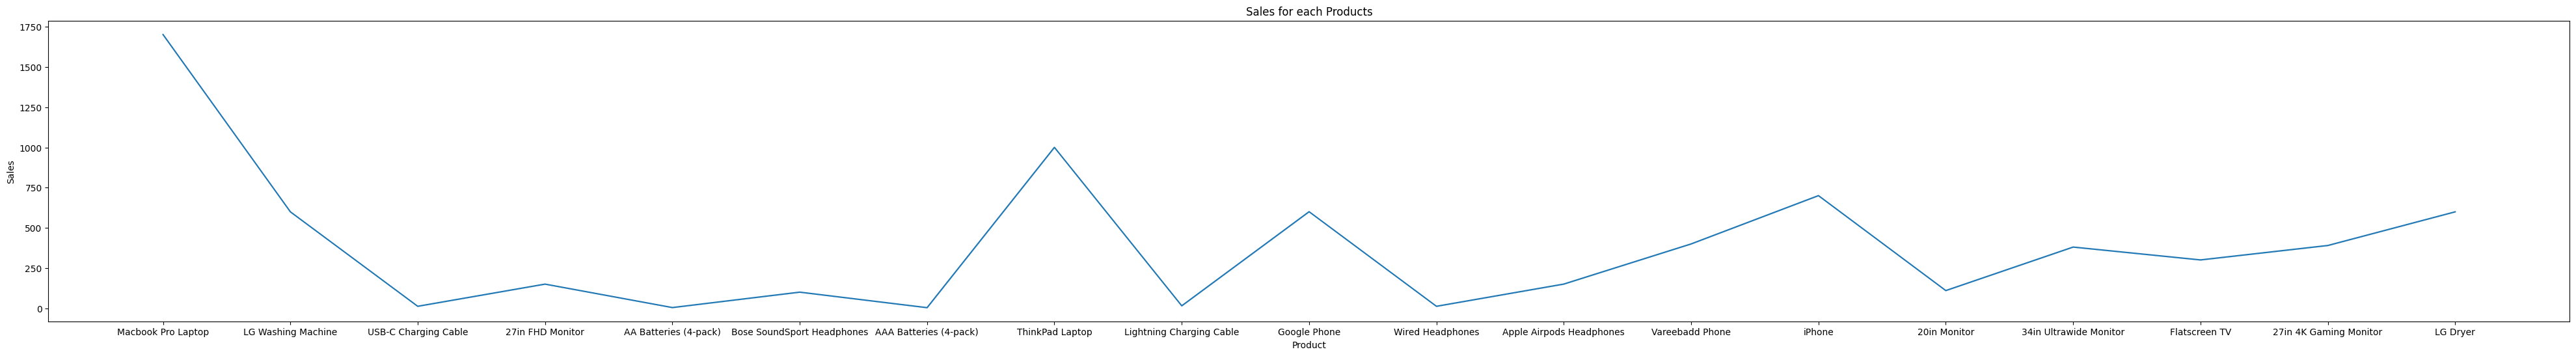

In [429]:
# Sales per Products
plt.figure(figsize=(50, 6))
sns.lineplot(data=dataset, x="Product", y="Sales")
plt.title("Sales for each Products")

In [430]:
data = dataset[["Product"]].value_counts(ascending=True)
data

Product                   
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2065
20in Monitor                   4101
ThinkPad Laptop                4128
Macbook Pro Laptop             4724
Flatscreen TV                  4800
Google Phone                   5525
34in Ultrawide Monitor         6181
27in 4K Gaming Monitor         6230
iPhone                         6842
27in FHD Monitor               7507
Bose SoundSport Headphones    13325
Apple Airpods Headphones      15549
Wired Headphones              18882
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Lightning Charging Cable      21658
USB-C Charging Cable          21903
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Products with the Number of Quantity Ordered')

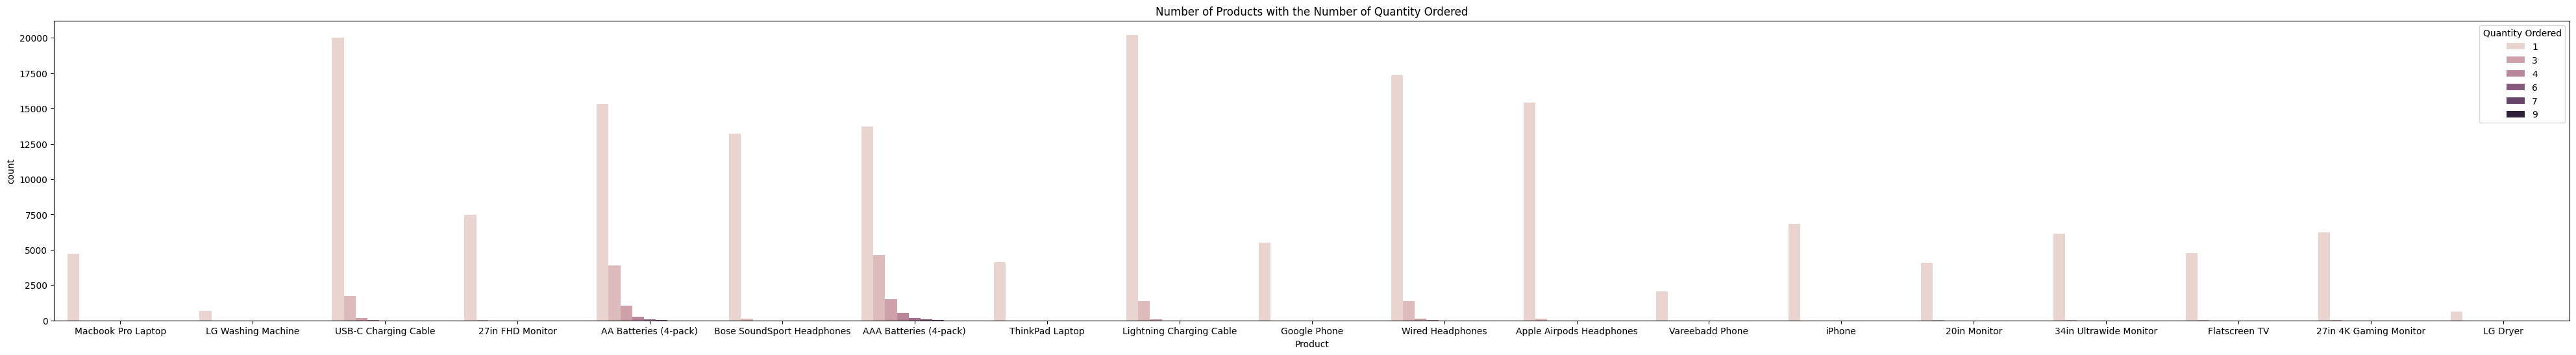

In [431]:

plt.figure(figsize=(50, 6))
sns.countplot(dataset, x="Product", hue="Quantity Ordered", legend="auto")
plt.title("Number of Products with the Number of Quantity Ordered")

Text(0.5, 1.0, 'Products that were sold')

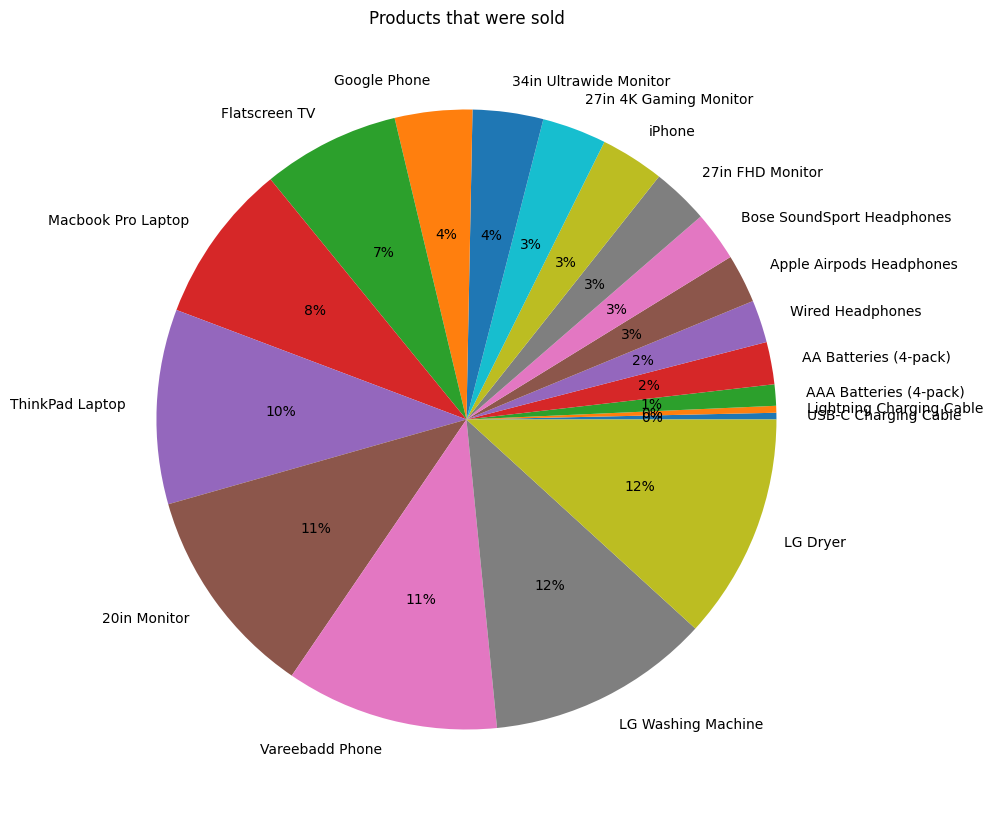

In [432]:
# Top 10 products bought
data = dataset[["Product"]].value_counts(ascending=True)
labels = ["USB-C Charging Cable", 'Lightning Charging Cable', "AAA Batteries (4-pack)", "AA Batteries (4-pack)", 
          "Wired Headphones", "Apple Airpods Headphones", 'Bose SoundSport Headphones', '27in FHD Monitor', 'iPhone',
          '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Google Phone', 'Flatscreen TV', 'Macbook Pro Laptop',
          'ThinkPad Laptop', '20in Monitor', 'Vareebadd Phone', 'LG Washing Machine', 'LG Dryer'
         ]
plt.figure(figsize=(10, 20))
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.title("Products that were sold")

Text(0.5, 1.0, 'Top 10 Products that were sold')

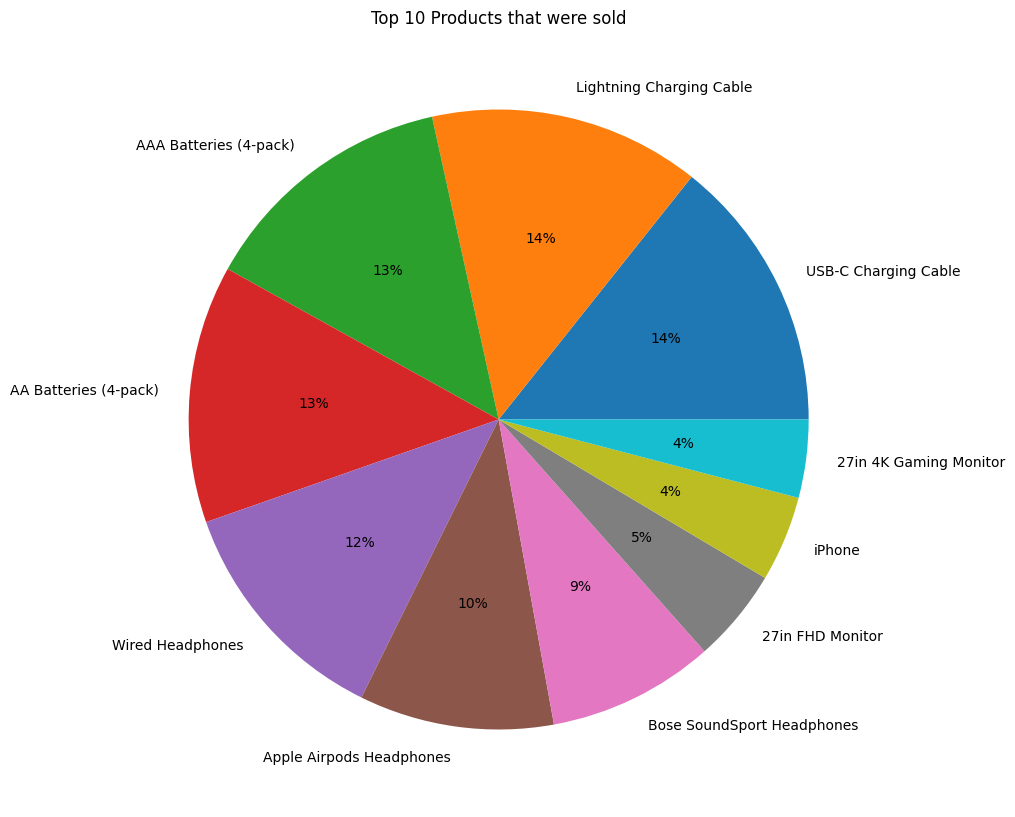

In [433]:
data = dataset.Product.value_counts().head(10)
plt.figure(figsize=(10, 20))
plt.pie(data, autopct='%1.0f%%', labels=data.index)
plt.title("Top 10 Products that were sold")

## Heat Map

Text(0.5, 1.0, 'Heat Map')

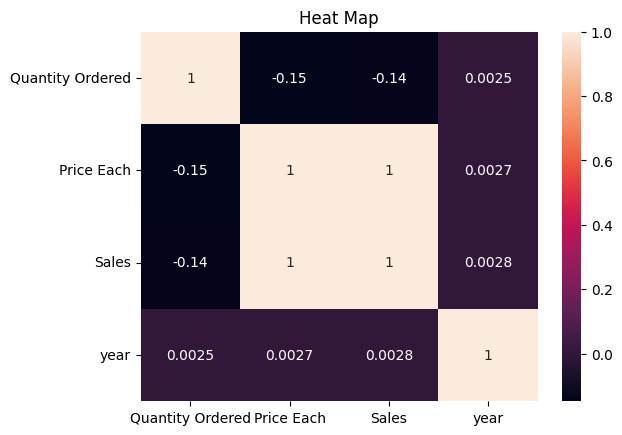

In [434]:
# heat map
sns.heatmap(dataset[['Quantity Ordered', 'Price Each', 'Sales', 'year']].corr(), annot=True)
plt.title("Heat Map")

In [435]:
# Scatterplot
# sns.scatterplot(data=dataset, x='Month', y='')
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")

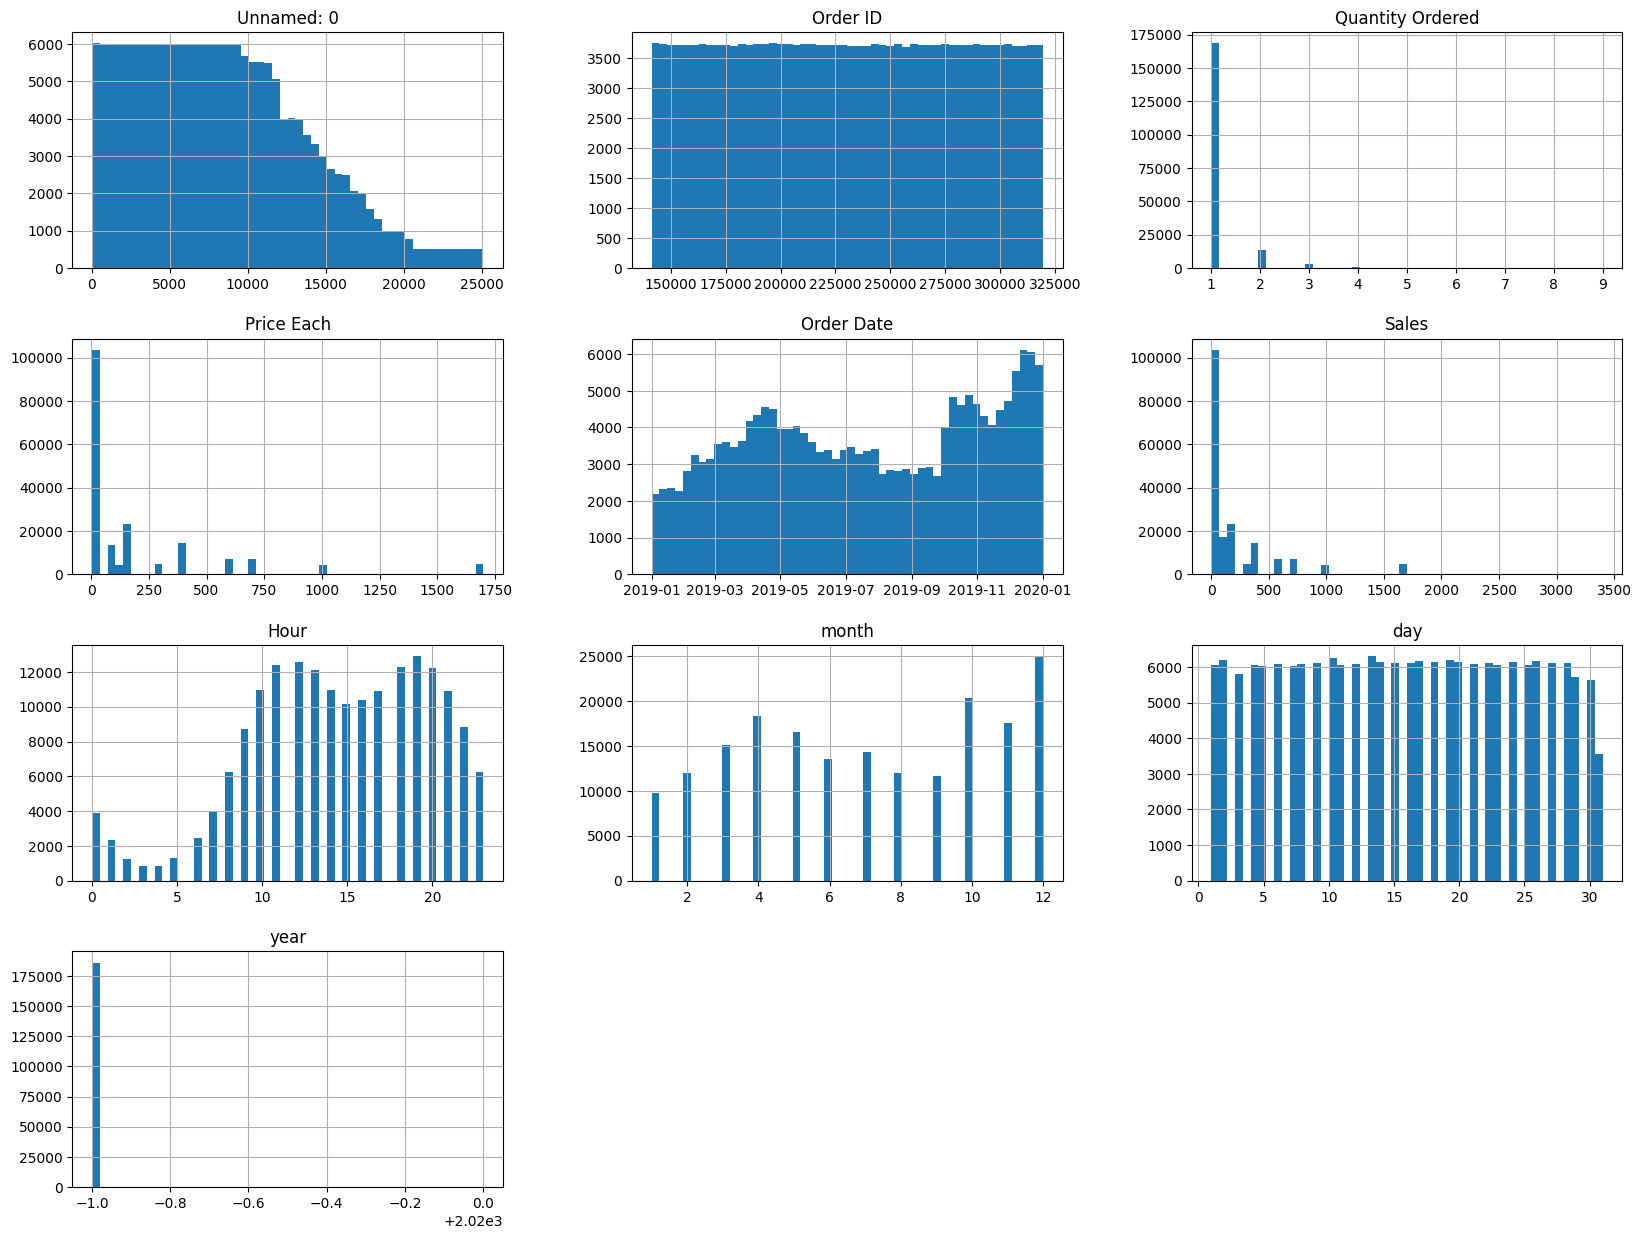

In [436]:
dataset.hist(bins=50, figsize=(20, 15))
# plt.title("Correlation for the description of the stock market")
plt.show()